In [3]:
from ml4floods.data import cmcloudsen12
import torch

device = torch.device("cpu")
model_cloud_detection = cmcloudsen12.CDModel(device=device)

weights_file = "/media/disk/databases/WORLDFLOODS/cloudSEN12model.ckpt"
weights = torch.load(weights_file, map_location=device)
model_cloud_detection.load_state_dict(weights["state_dict"])

<All keys matched successfully>

In [5]:
from ml4floods.data.worldfloods import dataset
from ml4floods.data.worldfloods.configs import BANDS_S2

tiff_s2 = "/media/disk/databases/WORLDFLOODS/2_Mart/worldfloods_extra_v2_0_DEF/unused/S2/EMSR634_AOI07_GRA_PRODUCT.tif"

torch_inputs, transform = dataset.load_input(tiff_s2, window=None, channels=BANDS_S2)
torch_inputs.shape

torch.Size([13, 919, 1178])

<AxesSubplot:>

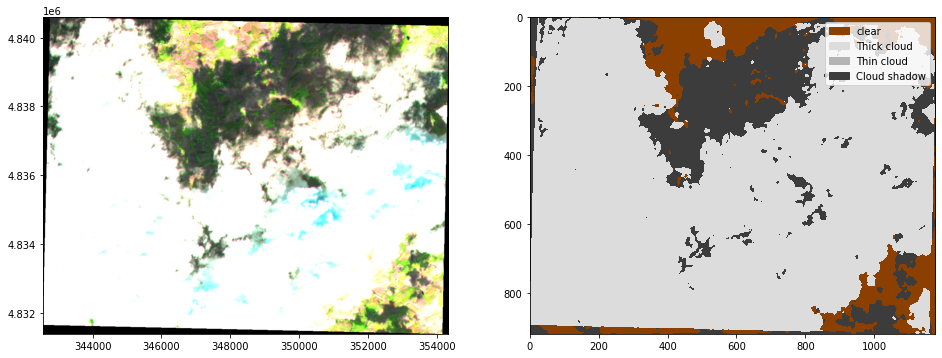

In [15]:
from ml4floods.visualization import plot_utils
import matplotlib.pyplot as plt

torch_inputs_toa = torch_inputs / 10_000
cloudmask = cmcloudsen12.padded_predict(torch_inputs_toa, model_cloud_detection, device=device)

fig, ax = plt.subplots(1,2, figsize=(16,8))
plot_utils.plot_swirnirred_image(torch_inputs, transform=transform, ax=ax[0])
plot_utils.plot_cloudSEN12mask(cloudmask,ax=ax[-1])

In [18]:
tiff_gt = "/media/disk/databases/WORLDFLOODS/2_Mart/worldfloods_extra_v2_0_DEF/unused/gt/EMSR634_AOI07_GRA_PRODUCT.tif"
torch_targets, _ = dataset.load_input(tiff_gt, window=None, channels=[0,1])
torch_targets.shape

torch.Size([2, 919, 1178])

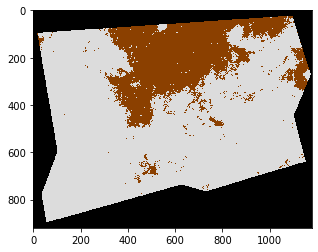

<AxesSubplot:>

In [21]:
import numpy as np
COLORS_CLOUD_GT = np.array([[0,0,0],
                            [139, 64, 0], # clear
                            [220, 220, 220]], # Thick cloud
                             dtype=np.float32) / 255
plot_utils.plot_segmentation_mask(torch_targets[0].numpy(), 
                                  COLORS_CLOUD_GT, 
                                  interpretation_array=["invalid","clear", "Thick cloud"])